#### 표본상관계수

In [3]:
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]    # 꽃받침의 길이
x2 = X[:, 1]    # 꽃받침의 폭
x3 = X[:, 2]    # 꽃잎의 길이
x4 = X[:, 3]    # 꽃잎의 폭
sp.stats.pearsonr(x1, x3)[0]

0.8717537758865832

#### Ex. 7.5.1

In [5]:
sp.stats.pearsonr(x1, x2)[0]

-0.11756978413300204

In [6]:
sp.stats.pearsonr(x3, x4)[0]

0.962865431402796

In [7]:
sp.stats.pearsonr(x2, x4)[0]

-0.3661259325364391

#### 확률변수의 공분산과 상관계수

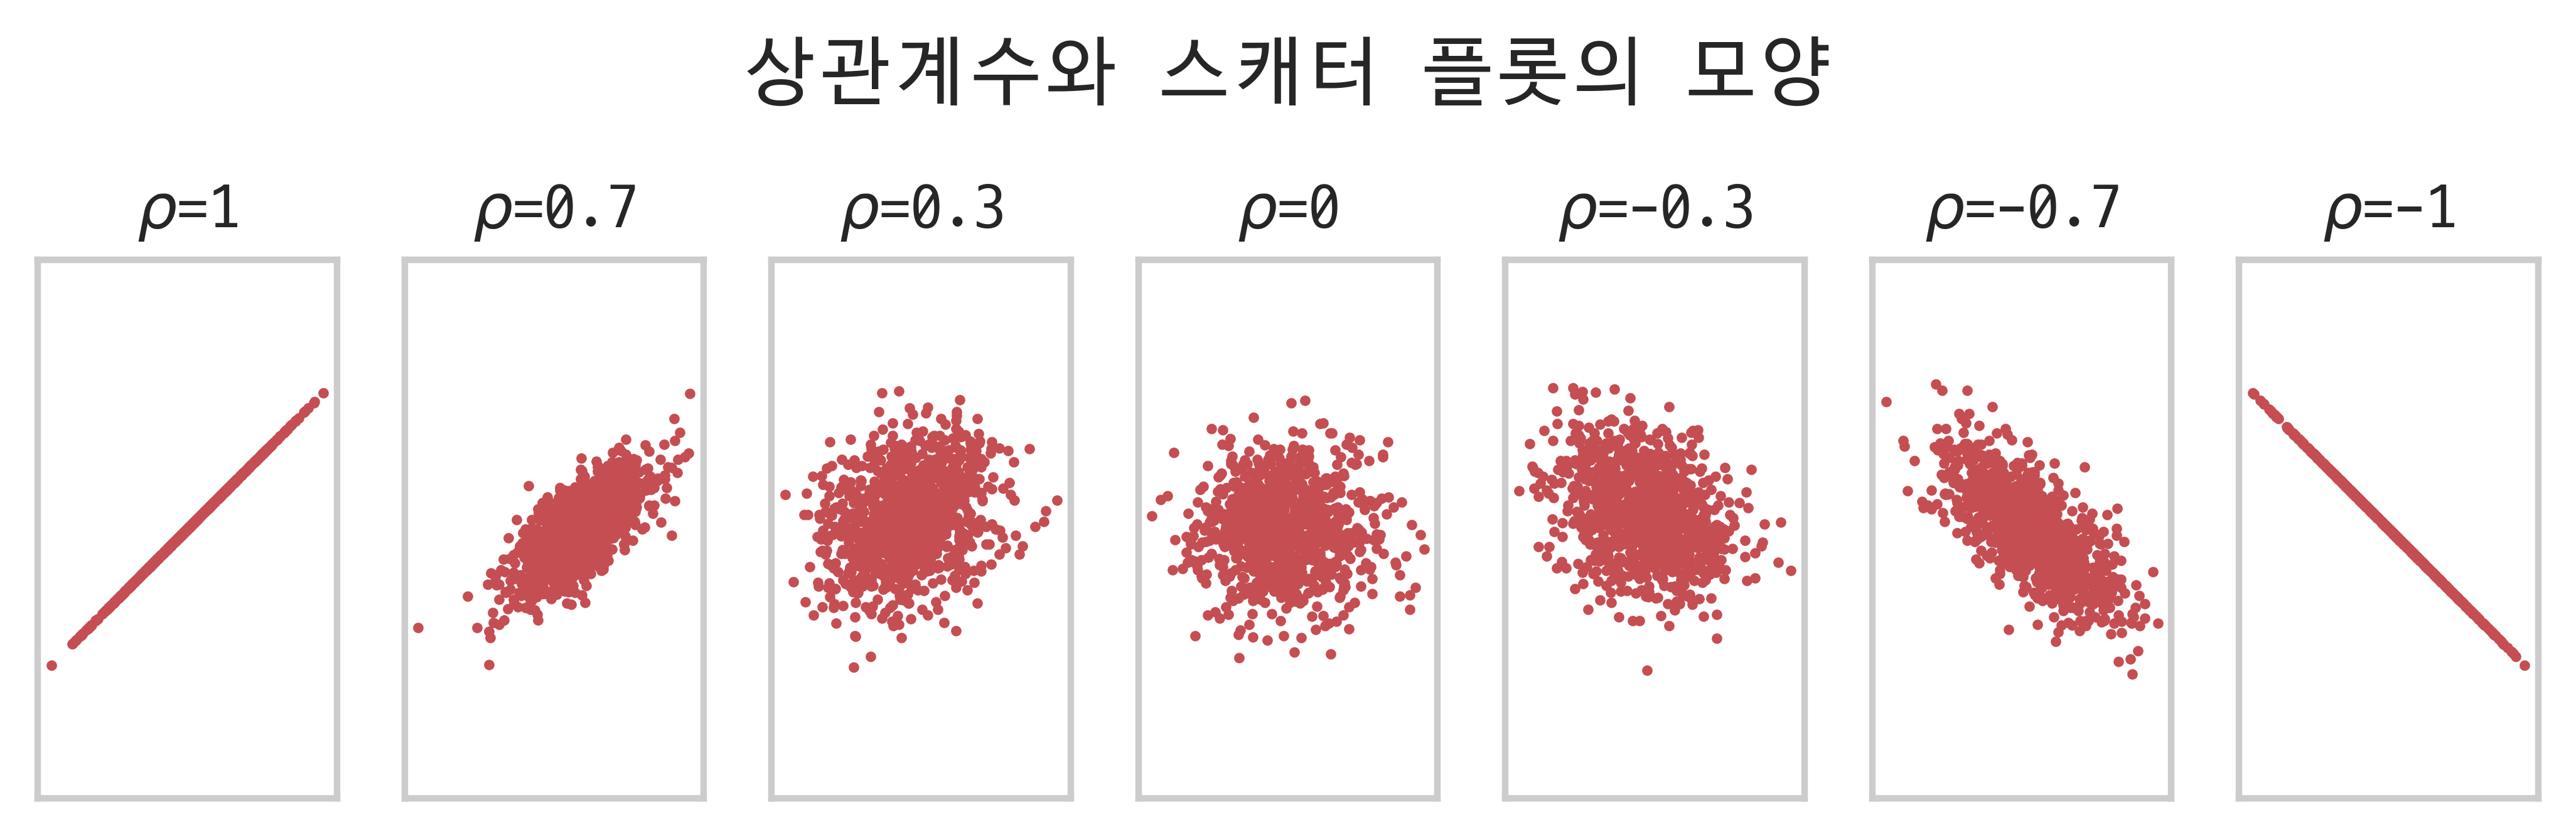

In [11]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r"$\rho$={}".format(r))
    
plt.suptitle("상관계수와 스캐터 플롯의 모양", y=1.1)
plt.tight_layout()
plt.show()

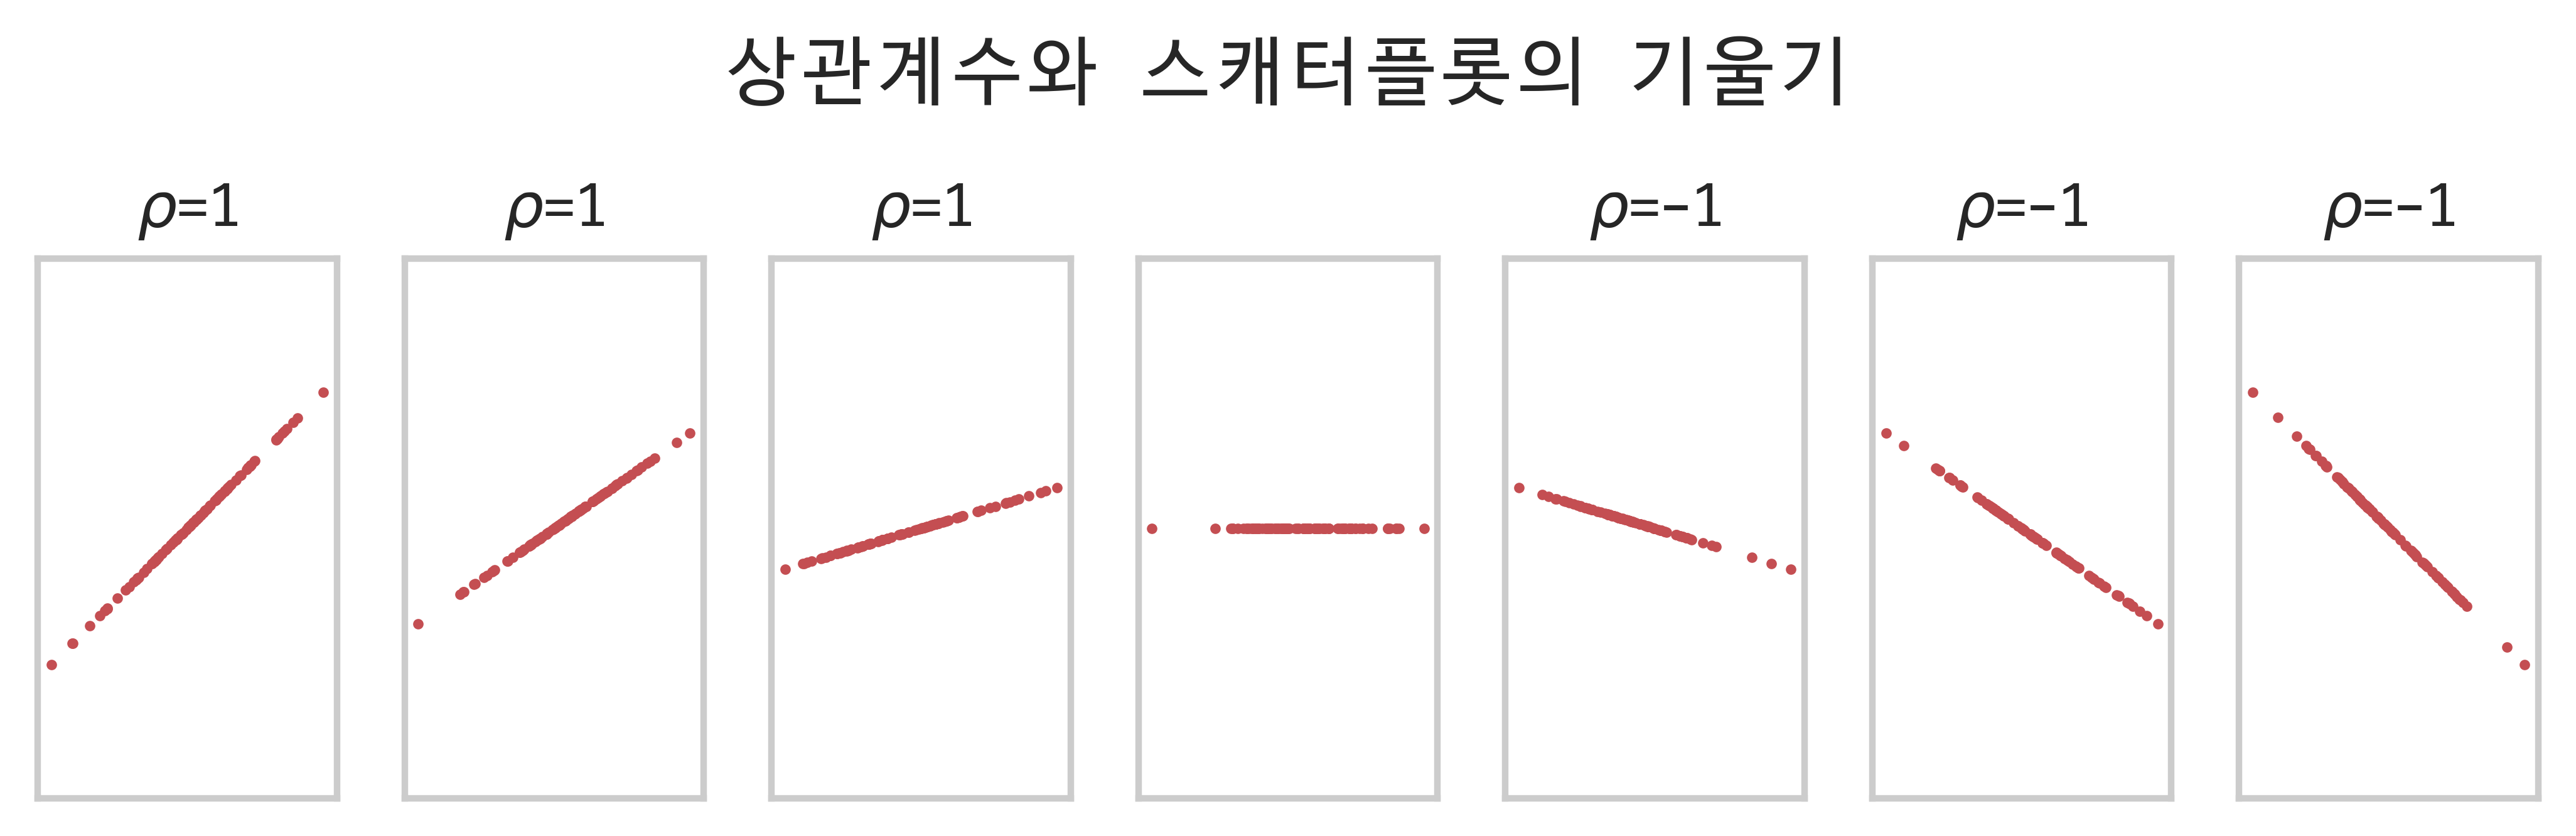

In [13]:
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope), 2))
for i, s in enumerate(slope):
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(r"$\rho$=1")
    if s < 0:
        plt.title(r"$\rho$=-1")
    
plt.suptitle("상관계수와 스캐터플롯의 기울기", y=1.1)
plt.tight_layout()
plt.show()

#### Ex. 7.5.2

In [23]:
a = np.array(np.random.randint(1000, size=10))
b = np.array(np.random.randint(1000, size=10))

In [24]:
sp.stats.pearsonr(a, b)[0]

-0.21956910074964858

In [25]:
a = np.array(np.random.randint(1000, size=10000))
b = np.array(np.random.randint(1000, size=10000))

In [26]:
sp.stats.pearsonr(a, b)[0]

-0.004300681529002839

In [27]:
a = np.array(np.random.randint(1000, size=1000000))
b = np.array(np.random.randint(1000, size=1000000))
sp.stats.pearsonr(a, b)[0]

0.000333994064862022

#### 비선형 상관관계

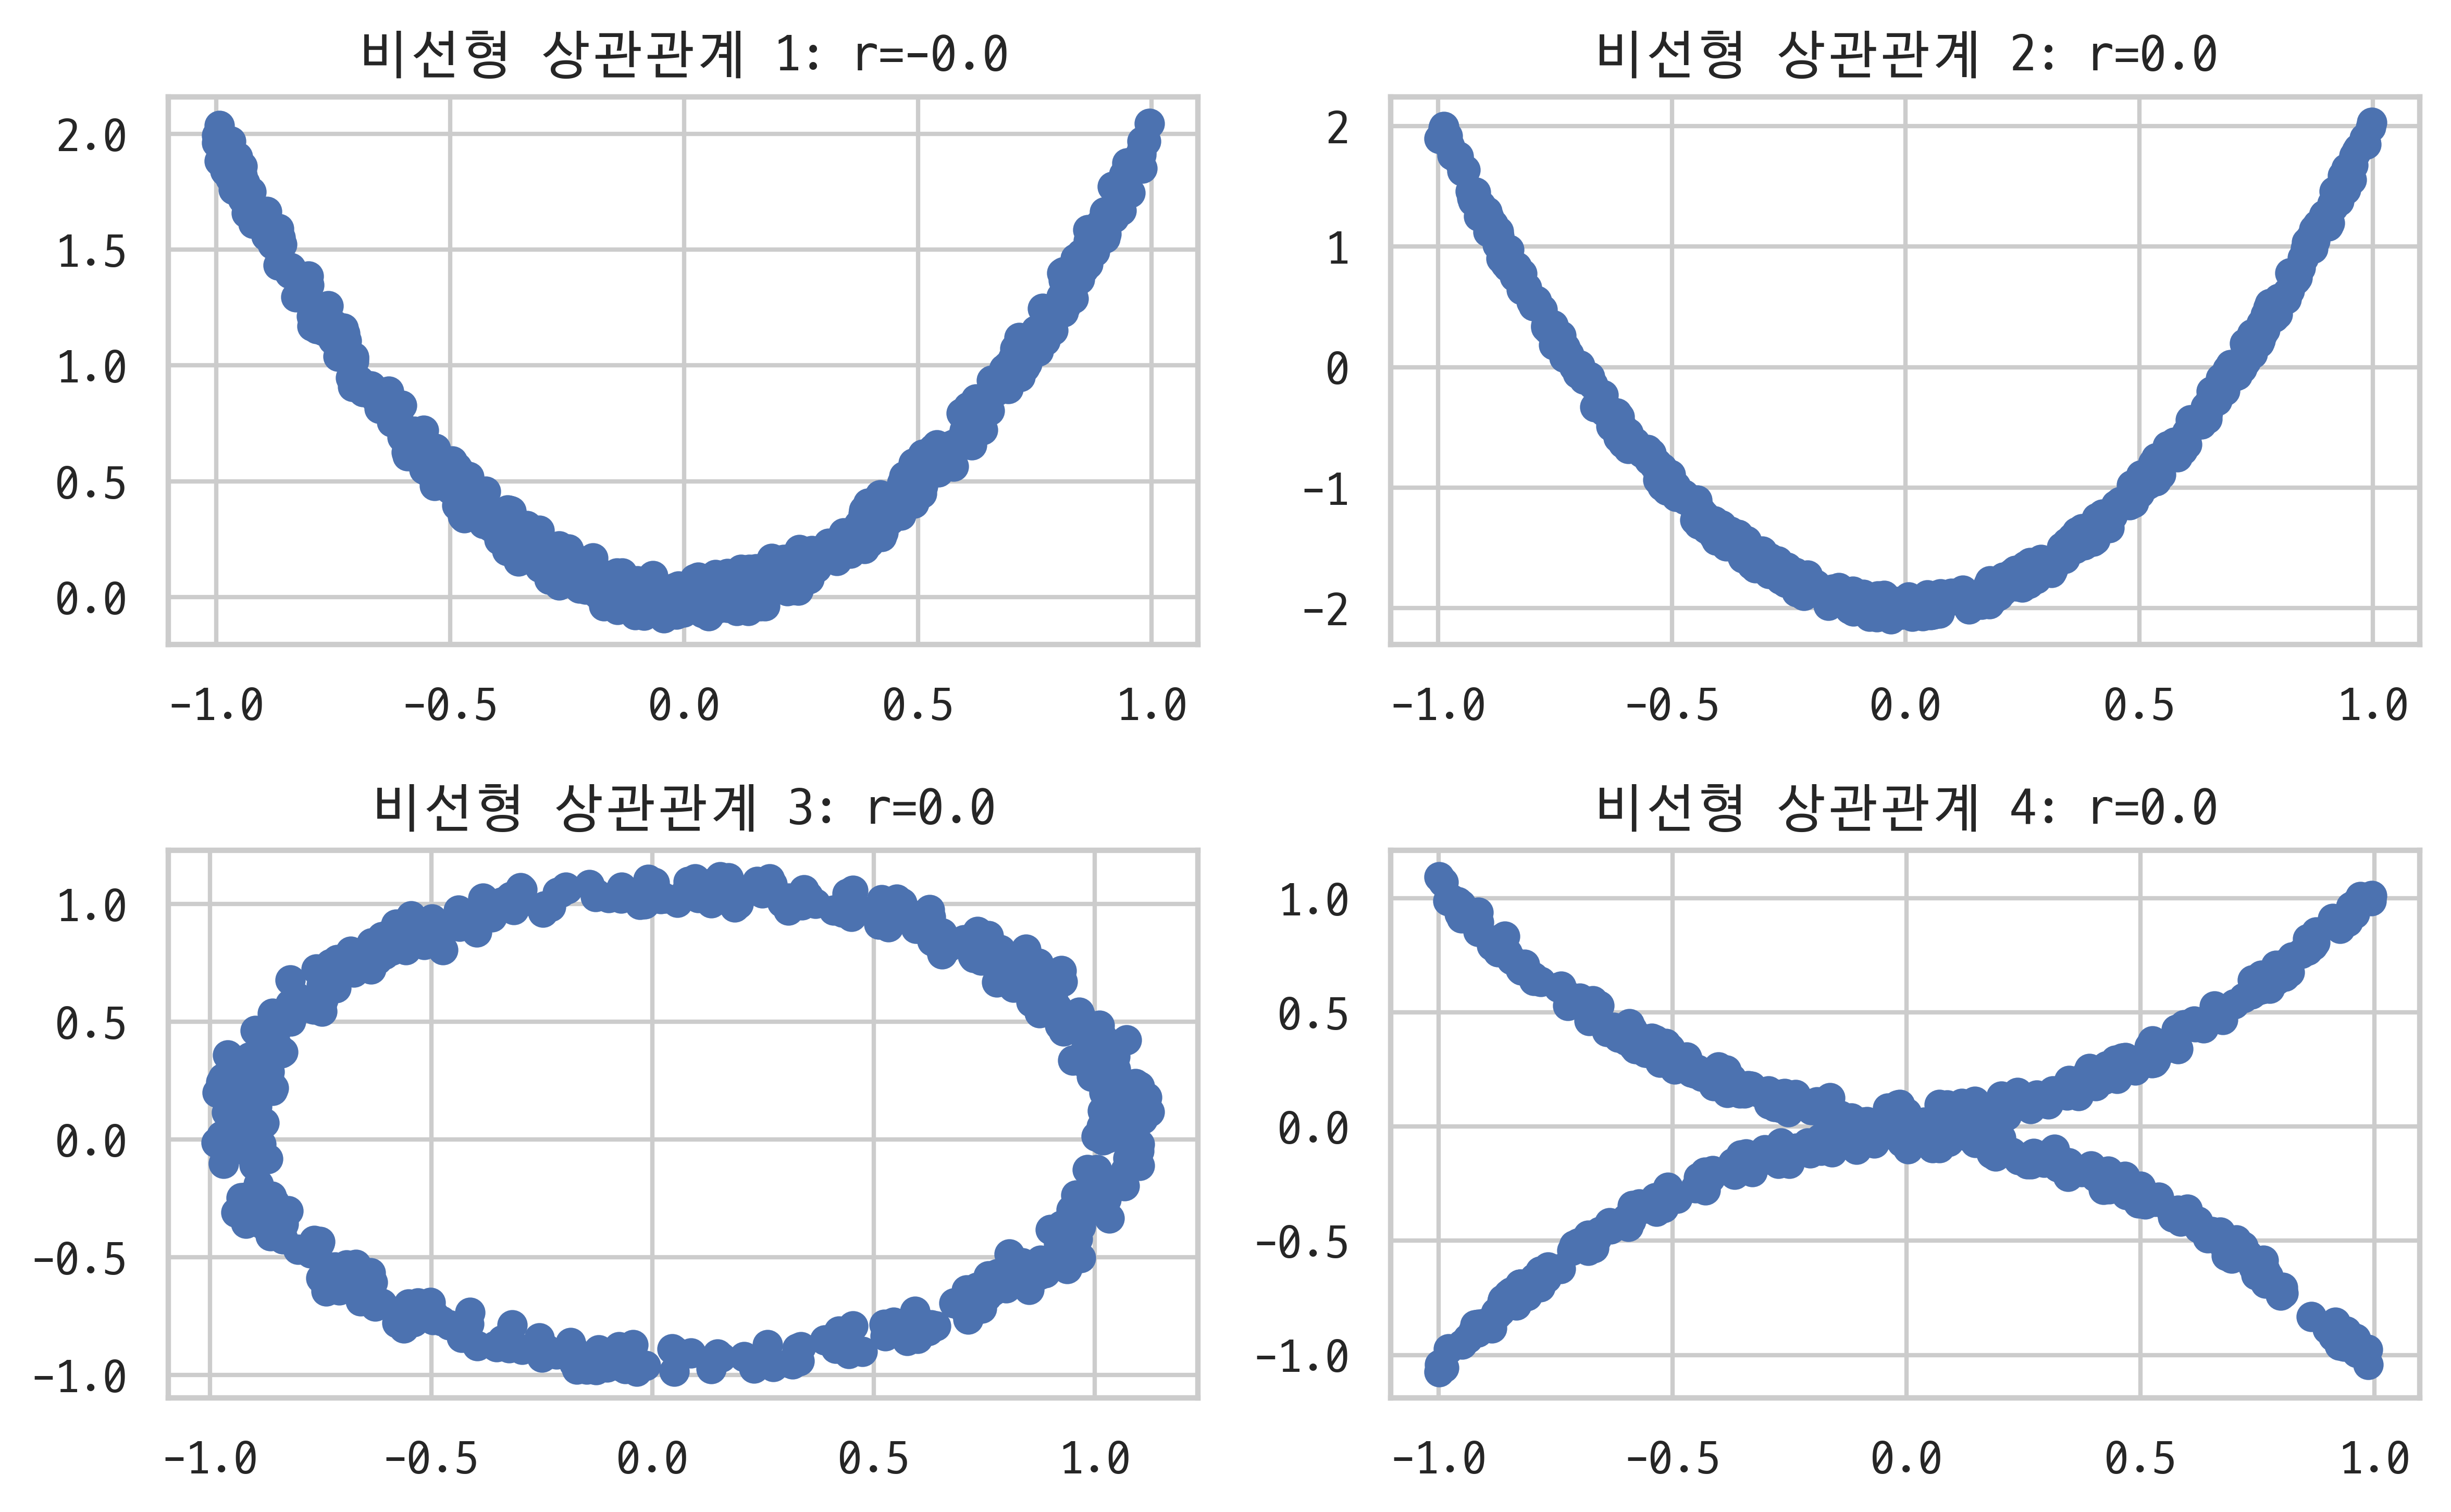

In [30]:
n = 500
np.random.seed(1)
plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r"비선형 상관관계 1: r={:3.1f}".format(r1))
plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5) + 0.1 * np.random.uniform(-1, 1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r"비선형 상관관계 2: r={:3.1f}".format(r2))
plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(r"비선형 상관관계 3: r={:3.1f}".format(r3))
plt.subplot(224)
x4 = np.random.uniform(-1, 1, n)
y4 = (x4**2 + np.random.uniform(0, 0.1, n)) * np.array([-
                                                        1, 1])[np.random.randint(0, 2, size=n)]
plt.scatter(x4, y4)
r4 = sp.stats.pearsonr(x4, y4)[0]
plt.title(r"비선형 상관관계 4: r={:3.1f}".format(r4))
plt.tight_layout()
plt.show()

#### 엔스콤 데이터

In [31]:
data = sm.datasets.get_rdataset("anscombe")
df = data.data
df[["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]]

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


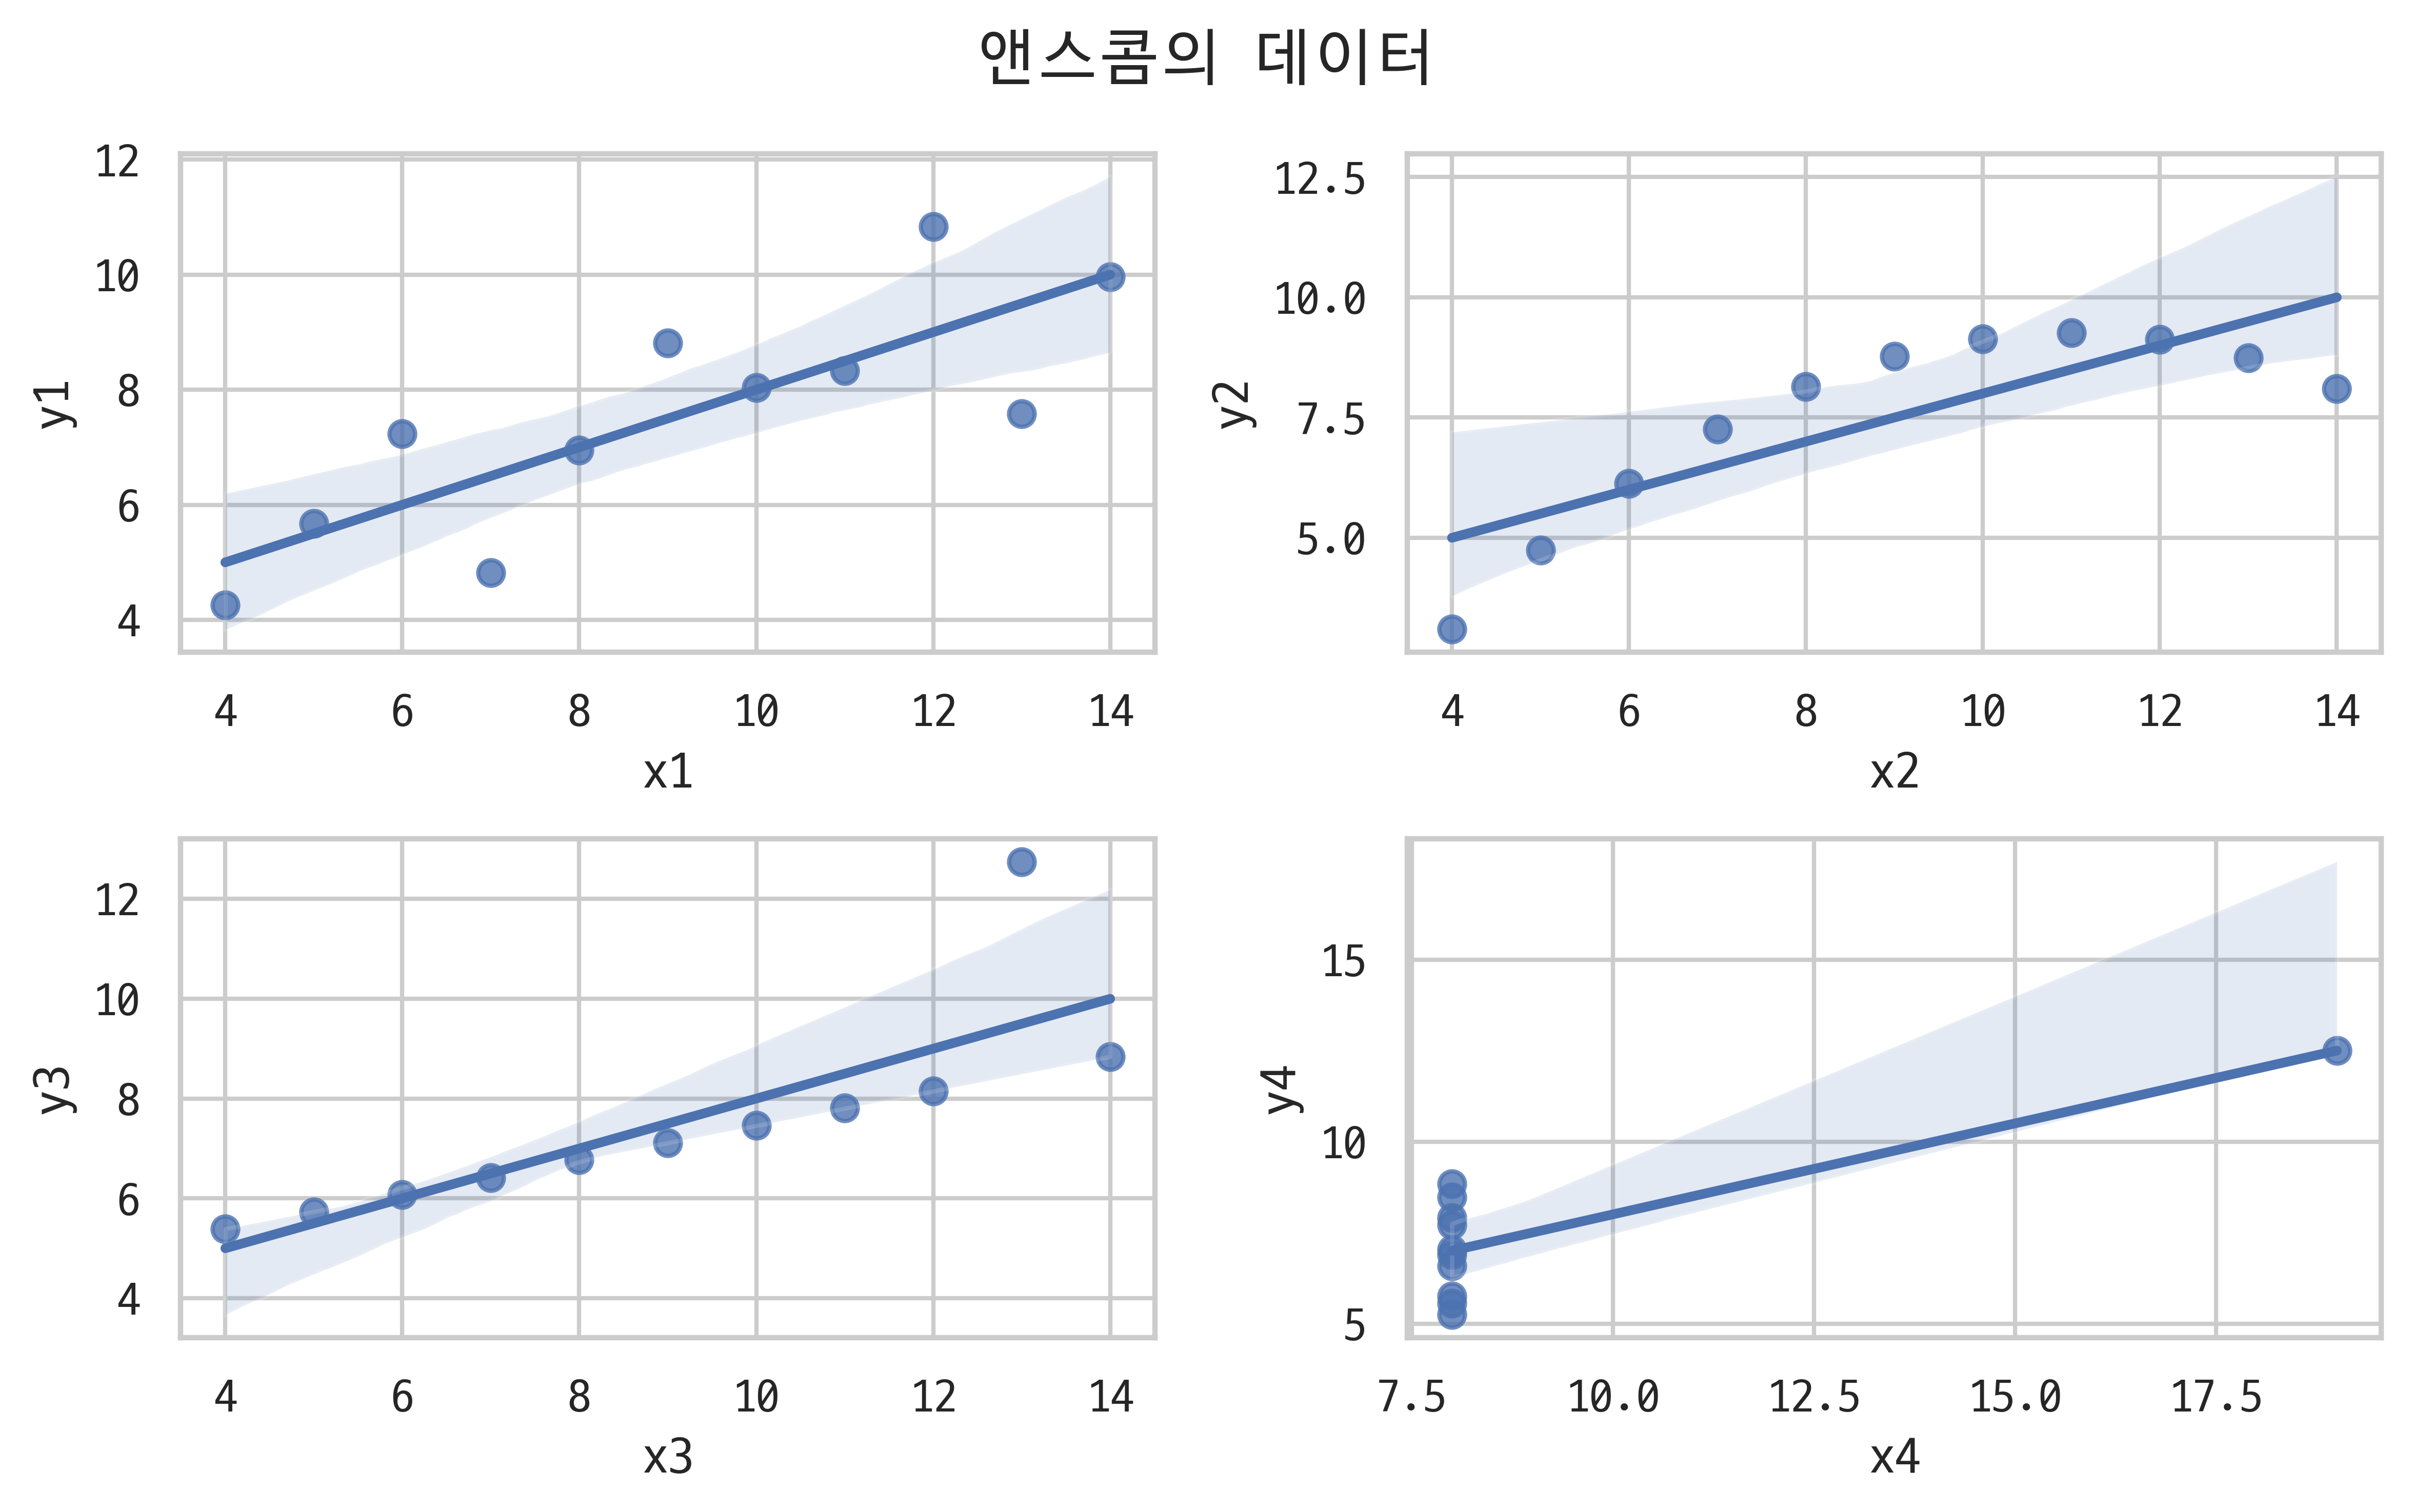

In [32]:
plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("앤스콤의 데이터")
plt.show()

#### Ex. 7.5.4

In [35]:
X = load_iris().data
x1 = X[:, 0]    # 꽃받침의 길이
x2 = X[:, 1]    # 꽃받침의 폭
x3 = X[:, 2]    # 꽃잎의 길이
x4 = X[:, 3]    # 꽃잎의 폭

In [39]:
x1 = x1 - x1.mean()
x2 = x2 - x2.mean()
x3 = x3 - x3.mean()
x4 = x4 - x4.mean()

In [43]:
x1_var_matrix = (x1 @ x1.T) / len(x1)
x2_var_matrix = (x2 @ x2.T) / len(x2)
x3_var_matrix = (x3 @ x3.T) / len(x3)
x4_var_matrix = (x4 @ x4.T) / len(x4)
x1_var_matrix, x2_var_matrix, x3_var_matrix, x4_var_matrix

(0.6811222222222223,
 0.1887128888888889,
 3.0955026666666665,
 0.5771328888888888)